# Основы `matplotlib` часть 2

In [1]:
#! /usr/bin/env pthon3
# -*- coding: utf-8 -*-

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
plt.style.use('black_white.mplstyle')

## Дополнительные способы создания сетки субграфиков

Если необходимо создать большое количество субграфиков, то можно воспользоваться функцией `plt.subplots()`. Эта функция создаст целую сетку субграфиков и вернет объект `figure` и массив объектов `axes`. В качестве аргументов `subplots` принимает количество строк и столбцов, а также необязательные логические аргументы `sharex` и  `sharey` которые позволяют установить общую разметку координат. Проиллюстрируем работу функции на примере.

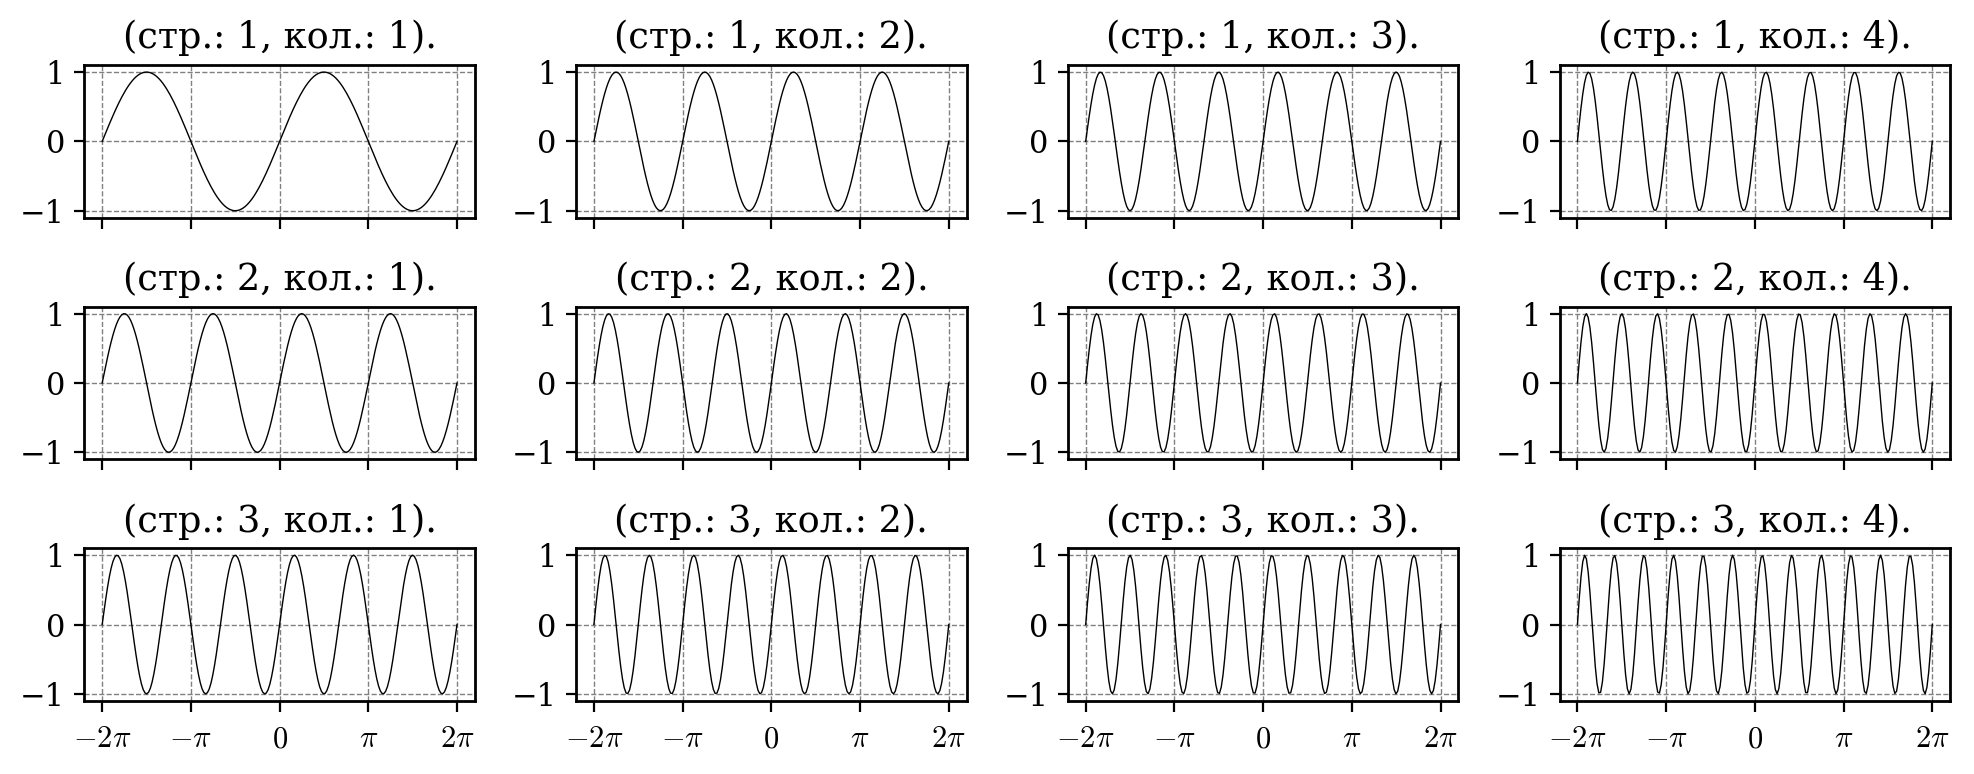

In [4]:
rows_number = 3; columns_number = 4
fig06, ax06  = plt.subplots(nrows = rows_number, ncols = columns_number,
                            sharex=True, num=6)

for (i, j), ax in np.ndenumerate(ax06):
    ax.set_title("(стр.: {0}, кол.: {1}).".format(i+1, j+1))

t = np.linspace(-2*np.pi, 2*np.pi, 200)
ticklabels = ['$-2\pi$','$-\pi$','$0$','$\pi$','$2\pi$']

for (i, j), ax in np.ndenumerate(ax06):
    ax.plot(t, np.sin((i+j+1)*t), linewidth=0.5)
    ax.xaxis.set_ticks(np.linspace(-2*np.pi,2*np.pi,5))
    ax.xaxis.set_ticklabels(ticklabels)

fig06.tight_layout()
fig06.savefig('img06.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

Для обхода массива `ax06` мы использовали функцию `ndenumerate` библиотеки `NumPy` которая работает аналогично Встроенной функции `enumerate`, но возвращает в случае двумерного массива кортеж индексов `(i, j)`, который мы сразу же распаковываем в соответствующие индексы. Опция `sharex=True` убирает разметку оси $Ox$ всех субграфиков кроме нижнего ряда. Это экономит место и делает изображение более чистым.

Если необходимо задать неоднородную сетку субграфиков, то можно воспользоваться функцией `gridspec.GridSpec` для чего необходимо предварительно импортировать соответствующий подмодуль `import matplotlib.gridspec as gridspec`. Эта функция возвращает массив, с помощью которого можно затем задать местоположение и размеры субграфиков с используя обычный синтаксис срезов языка Python. Применение `GridSpec` иллюстрирует следующий пример.

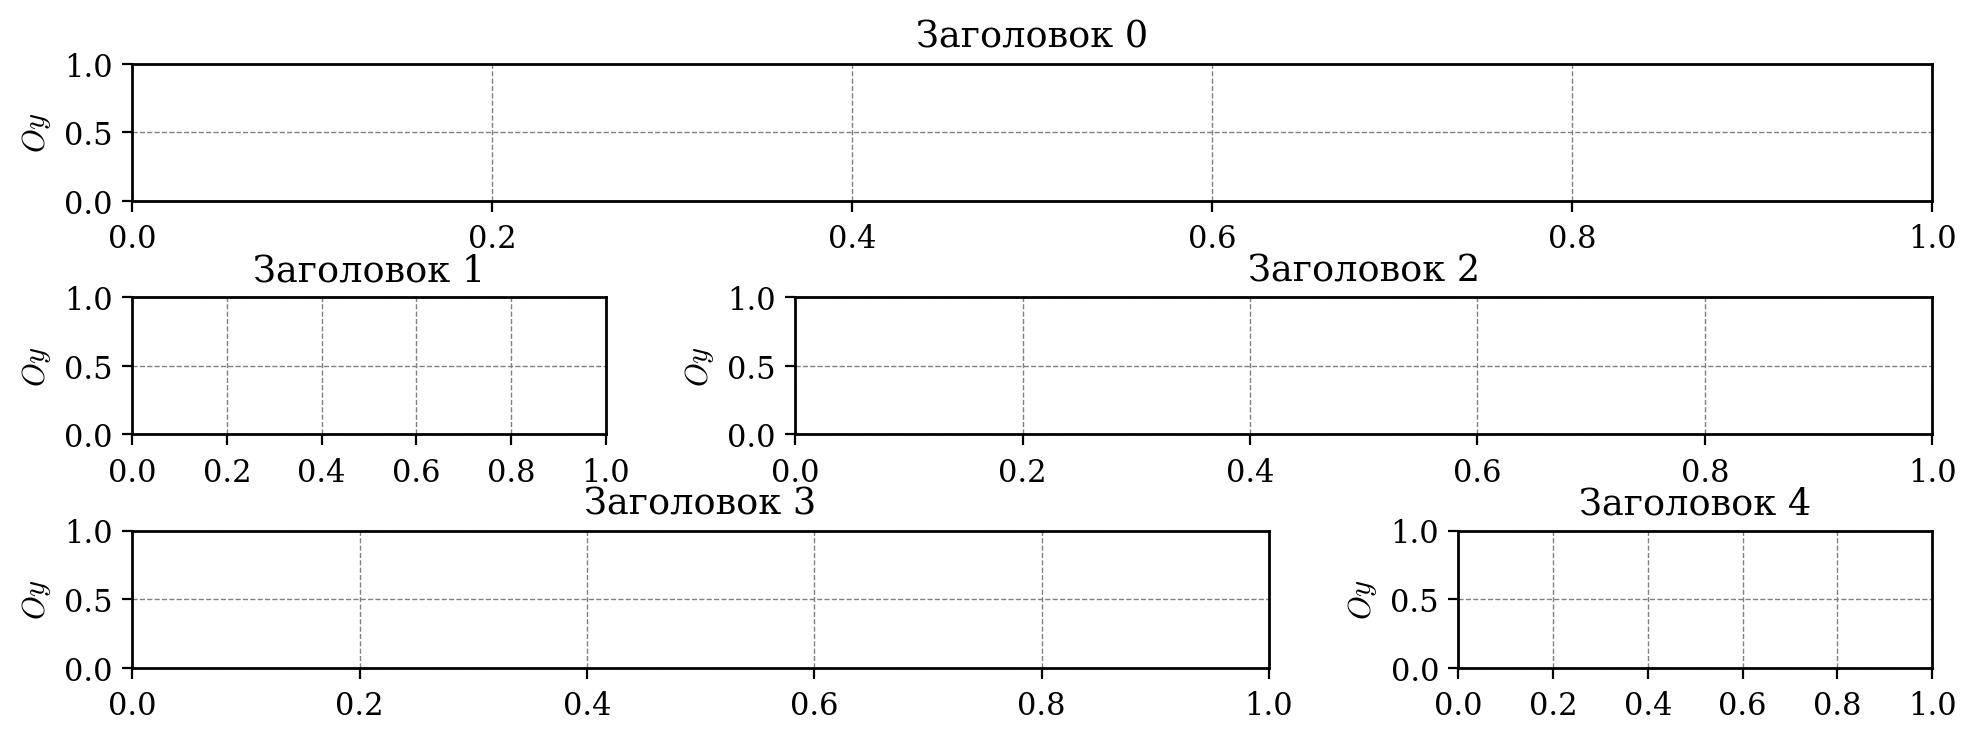

In [5]:
fig07 = plt.figure(num=7)
gs = gridspec.GridSpec(3, 3, left=0.0, right=0.9, wspace=0.4, hspace = 0.7)
ax07 = []
ax07.append(fig07.add_subplot(gs[0, 0:]))
ax07.append(fig07.add_subplot(gs[1, 0:1]))
ax07.append(fig07.add_subplot(gs[1, 1:]))
ax07.append(fig07.add_subplot(gs[2, 0:2]))
ax07.append(fig07.add_subplot(gs[2, 2:]))

for i, ax in enumerate(ax07):
    ax.set_title("Заголовок {0}".format(i))
    ax.set_ylabel("$Oy$")

fig07.savefig('img07.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

Наконец максимально гибкое средство настройки сетки субграфиков произвольного вида, это функция `plt.axes`. Данная функция принимает необязательный аргумент, представляющий собой список из четырех чисел в системе координат рисунка. Эти числа означают `левый угол`, `низ`, `ширину` и `высоту` в системе координат рисунка, отсчет которых начинается с 0 в нижнем левом и заканчивается 1 в верхнем правом углу рисунка. Первая пара из списка фактически представляет собой координаты левого нижнего угла прямоугольника, а вторая права координаты правого верхнего угла.

С помощью метода `axes` можно встраивать малые субграфики прямо в область координат большого графика, что может пригодится для отображения увеличенной окрестности особых точек, например точек пересечения двух кривых, как в примере ниже.

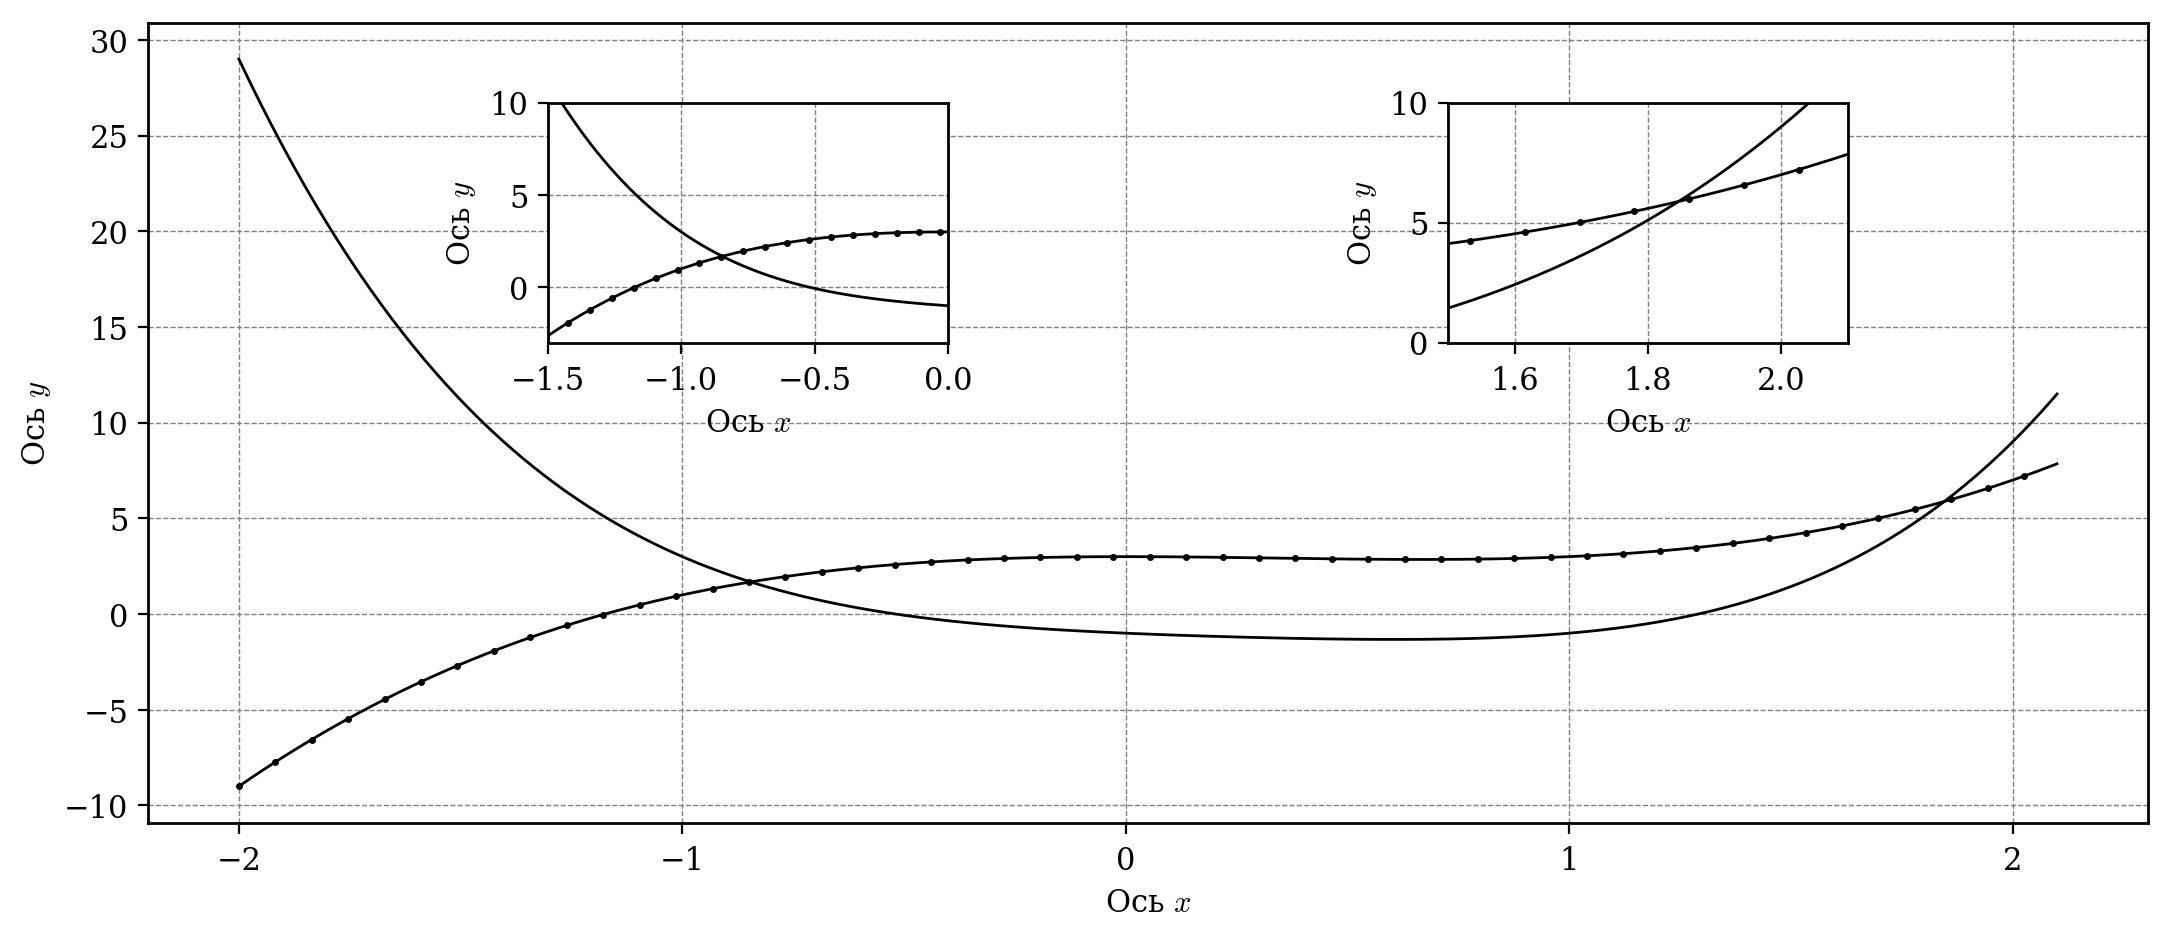

In [6]:
fig08 = plt.figure(num=8)
ax08 = [
    fig08.add_axes([0.0, 0.0, 1.0, 1.0]),
    fig08.add_axes([0.20, 0.6, 0.2, 0.3], xlim=(-1.5, 0), ylim=(-3, 10)),
    fig08.add_axes([0.65, 0.6, 0.2, 0.3], xlim=(1.5, 2.1), ylim=(0, 10))
]
t = np.linspace(-2.0, 2.1, 500)
y = t**4 - t**3 + t**2 - t - 1
z = t**3 - t**2 + 3
for ax in ax08:
    ax.plot(t, y, linewidth=1.0)
    ax.plot(t, z, linewidth=1.0, markevery=10)
    ax.set_xlabel(r'Ось $x$'); ax.set_ylabel(r'Ось $y$')

fig08.savefig('img08.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

## Манипуляция осями координат. Полярные координаты.

Как видно из примеров выше, по умолчанию координатные оси отображаются не по центру, а сбоку. Чаще всего такое расположение осей является оптимальным, так как не мешает восприятию графической информации. Однако есть возможность переместить оси координат в центр графика. Как это сделать показывает следующий пример.

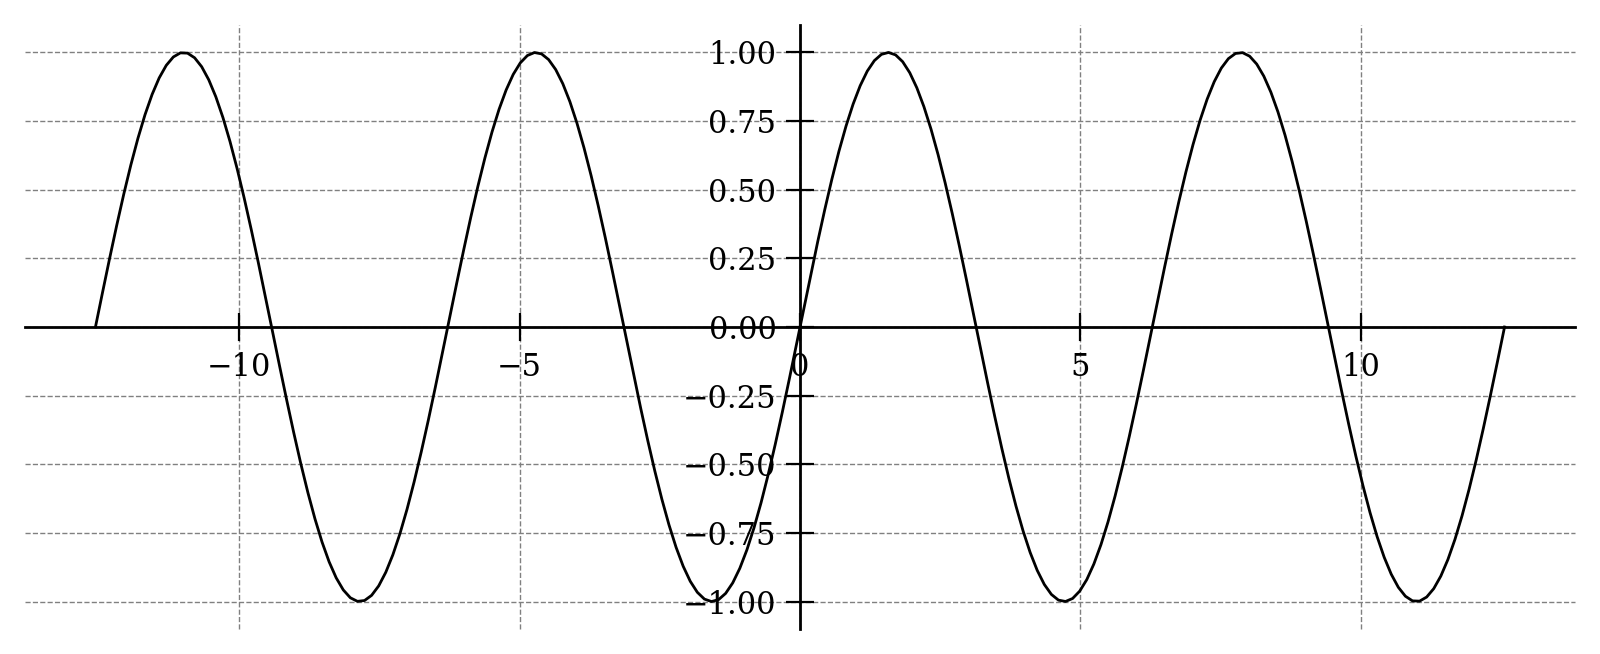

In [7]:
fig09 = plt.figure(num=9)
ax09 = fig09.add_subplot(1, 1, 1)

t = np.linspace(-4*np.pi, 4*np.pi, 200)
y = np.sin(t)
ax09.plot(t, y)
# Убираем верхнюю и правую оси координат
ax09.spines['top'].set_visible(False)
ax09.spines['right'].set_visible(False)

# ‘center’ -> (‘axes’,0.5) ‘zero’ -> (‘data’, 0.0)
# Переносим оставшиеся две оси в центр относительно графика
ax09.spines['bottom'].set_position('zero')
ax09.spines['left'].set_position('zero')

# настраиваем засечки на координатных линиях
ax09.xaxis.set_tick_params(direction='inout', length=10)
ax09.yaxis.set_tick_params(direction='inout', length=10)

fig09.savefig('img09.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

## Полярная система координат

Уравнения некоторых кривых сильно упрощаются, если совершить переход в полярную систему координат. В `matplotlib` есть возможность использовать полярную систему вместо декартовой. Рассмотрим на примере как это сделать. 

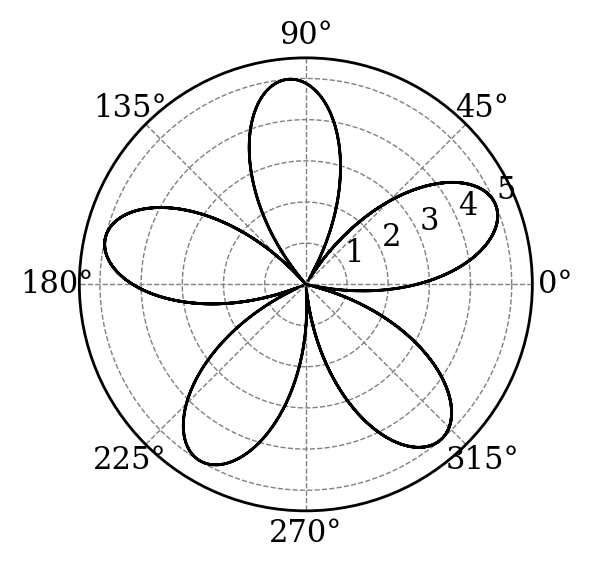

In [8]:
fig10 = plt.figure(num=10, figsize=(3,3))
ax10 = fig10.add_subplot(1, 1, 1, projection='polar')
φ = np.linspace(0.0, 10*np.pi, 1000)
r = 5*np.cos(2.5*φ-1)
ax10.plot(φ, r, linewidth=1.0)

fig10.savefig('img10.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

В компьютерной геометрии, однакл, полярная система координат используется не часто, так как обычно задача заключается в отображении кривых и поверхностей на экране монитора, который имеет прямоугольную форму, поэтому чаще все го используется декартова система координат и параметрические уравнения кривых.